# Using Linear Regression to Extract Physical Constants: Newtonian Gravitation

Author: Julie Butler, butle222@msu.edu

Date Created: October 15, 2022

Last Modified: November 7, 2022

Notebook 2/5 of the DSECOP Module: An Introduction to the Machine Learning Workflow with Linear Regression.  See the entire module [here]().

## Imports

First let's import the necessary packages needed to run this notebook.

In [1]:
##############################
##          IMPORTS         ##
##############################
# Needed for arrays and mathematical functions
import numpy as np
# For plotting
import matplotlib.pyplot as plt
# For importing and formatting data sets
import pandas as pd
# For the machine learning section, their functions will be explained later in
# the notebook
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Now we need to set up the notebook to sync with Google Drive.  There will be some pop-up windows you will need to follow the prompts on.

In [2]:
# GOOGLE DRIVE SET UP
#from google.colab import drive
# Mount my Google Drive
#drive.mount('/content/gdrive')

### IMPORTANT!

**Problem 1:** Change the below line to match the file directory where the notebooks and data are stored on your Google Drive.

In [3]:
# Directory to retrieve data files from (###CHANGE THIS###)
data_dir = '.'

## Building A Model

Given a star which has a mass of $m_1$ and is at location $\vec{r}_1$ and a planet which has a mass of $m_2$ and is at location $\vec{r}_2$, then the graviational force on the planet due to the star is:

$$\vec{F}_{G,21} = -G\frac{m_1m_2}{r_{21}^2}\hat{r}_{21},$$

where $\vec{r}_{21} = \vec{r}_1 - \vec{r}_2$.

However we also know that the net force on an object is given by Newton's second law:

$$\vec{F}_{net} = m\vec{a},$$

where $\vec{a}$ is the acceleration of the object.

If we assume that the only force acting on our planet is the gravitaional force due to being near the star, then its net force and the Newtonian gravitaional force equation are equivalent.  To simplfy calculations we will also only consider the magnitudes of both equations.

$$\vec{F}_{G,21} = \vec{F}_{net} \longrightarrow F_{G,21} = F_{net}$$

We can expand both equations using the above definitions, where the $m$ in the net force equation is $m_1$, the mass of the planet (i.e. the object who's motion we are studying).

$$-G\frac{m_1m_2}{r_{21}^2} = m_2a$$

We can simplify these equations a bit further by doing some algebra:

$$a = \frac{Gm_1}{r_{21}^2} = -Gm_1\frac{1}{r_{21}^2}$$

Now, let's separate the constants from the physical values and we know that both acceleration and position are time dependent, so we can add in a notation that reflects this.

$$a(t) =  Gm_1\frac{1}{r_{12}(t)^2}$$

Now, let's look at the equation for the output of the linear regression algorithm and compare it to the equation for acceleration which we have just derived.

$$\hat{y} = X\theta$$

By comparing the equation for a(t) to the equation for $\hat{y}$, we can begin to see how we can format your acceleration equation as a linear regression problem.  First, we can see that $\hat{y}$ will be the acceleration of our planet, which we can expand as a vector for each time step we have data on, for a total of N data points.

$$\hat{y} = a(t)\ = \ \begin{bmatrix}
    a(t_0) \
    a(t_1) \\
    a(t_2) \\
    . \\
    . \\
    . \\
    a(t_N)
\end{bmatrix}$$

We can also see that our X data will be the inverse squared position, which we can represent in vector form based on time steps as:

$$X\ =\ \frac{1}{r_{21}^2(t)}\ =\ \begin{bmatrix}
    1/r_{21}^2(t_0) \\
    1/r_{21}^2(t_1) \\
    1/r_{21}^2(t_2) \\
    . \\
    . \\
    . \\
    1/r_{21}^2(t_N) \\
\end{bmatrix}$$

Here, we can take a moment to simplify the notation since we only have two objects in total, the planet and the star.  For the remainer of this problem we will simplify the notation to r$_{12}$ $\rightarrow$ r$_2$.

$$X\ =\ \frac{1}{r_{2}^2(t)}\ =\ \begin{bmatrix}
    1/r_{2}^2(t_0) \\
    1/r_{2}^2(t_1) \\
    1/r_{2}^2(t_2) \\
    . \\
    . \\
    . \\
    1/r_{2}^2(t_N) \\
\end{bmatrix}$$

Finally, the weights, $\theta$, will be the gravitational constant, G, multiplied by the mass of the sun, m$_1$.

$$\theta = Gm_1$$

The goal of this linear regression analysis will be to determine the value of m$_1$, the mass of the star the planet is orbiting.

### Import and Format the Data Set

The data needed for this problem is stored in the file `data_notebook_2_one_planet.csv`.  Before we attempt to apply linear regression to this problem we will need to import and format the data set.

**Problem 2:** Import the data set as a Pandas dataframe and print the first few lines.

In [4]:
df = pd.read_csv(data_dir + '/data_notebook_2_one_planet.csv')
df

,t,a2,v2,r2
0,0.000000e+00,0.05336,23099.783549,1.000000e+10
1,1.360010e+04,0.05336,23099.780737,1.000000e+10
2,2.720019e+04,0.05336,23099.772304,1.000000e+10
3,4.080029e+04,0.05336,23099.758258,1.000001e+10
4,5.440038e+04,0.05336,23099.738613,1.000002e+10
...,...,...,...,...
995,1.353210e+07,0.05336,23099.711063,1.000003e+10
996,1.354570e+07,0.05336,23099.736746,1.000002e+10
997,1.355930e+07,0.05336,23099.756851,1.000001e+10
998,1.357290e+07,0.05336,23099.771359,1.000001e+10


**Problem 3:** Remembering that a subscript of "2" represents data collected about the planet, what data is provided for this problem.  Write your response in the textbox below.  In the code cell below that, convert each column of the data file to a NumPy array, saving the NumPy arrays with useful and descriptive names (i.e. t, a, v, and r).

> The data provided for this problem is the earth time, and planet acceleration, velocity, and distance from a star.

In [8]:
t = df['t'].values
a = df['a2'].values
v = df['v2'].values
r = df['r2'].values

In [9]:
t

array([       0.        ,    13600.09563275,    27200.19126549,
          40800.28689824,    54400.38253098,    68000.47816373,
          81600.57379647,    95200.66942922,   108800.76506196,
         122400.86069471,   136000.95632745,   149601.0519602 ,
         163201.14759294,   176801.24322569,   190401.33885843,
         204001.43449118,   217601.53012392,   231201.62575667,
         244801.72138941,   258401.81702216,   272001.9126549 ,
         285602.00828765,   299202.10392039,   312802.19955314,
         326402.29518589,   340002.39081863,   353602.48645138,
         367202.58208412,   380802.67771687,   394402.77334961,
         408002.86898236,   421602.9646151 ,   435203.06024785,
         448803.15588059,   462403.25151334,   476003.34714608,
         489603.44277883,   503203.53841157,   516803.63404432,
         530403.72967706,   544003.82530981,   557603.92094255,
         571204.0165753 ,   584804.11220804,   598404.20784079,
         612004.30347353,   625604.39910

In [10]:
a

array([0.05336   , 0.05335999, 0.05335995, 0.05335988, 0.05335979,
       0.05335968, 0.05335953, 0.05335937, 0.05335917, 0.05335895,
       0.05335871, 0.05335844, 0.05335815, 0.05335783, 0.05335749,
       0.05335713, 0.05335674, 0.05335633, 0.0533559 , 0.05335545,
       0.05335497, 0.05335447, 0.05335396, 0.05335342, 0.05335286,
       0.05335229, 0.05335169, 0.05335108, 0.05335045, 0.05334981,
       0.05334915, 0.05334847, 0.05334778, 0.05334707, 0.05334636,
       0.05334563, 0.05334488, 0.05334413, 0.05334337, 0.05334259,
       0.05334181, 0.05334102, 0.05334022, 0.05333942, 0.05333861,
       0.0533378 , 0.05333698, 0.05333616, 0.05333533, 0.05333451,
       0.05333368, 0.05333285, 0.05333203, 0.05333121, 0.05333038,
       0.05332957, 0.05332875, 0.05332794, 0.05332714, 0.05332634,
       0.05332555, 0.05332477, 0.053324  , 0.05332324, 0.05332248,
       0.05332174, 0.05332101, 0.05332029, 0.05331959, 0.0533189 ,
       0.05331822, 0.05331756, 0.05331692, 0.05331629, 0.05331

In [11]:
v

array([23099.78354877, 23099.7807368 , 23099.77230369, 23099.75825775,
       23099.7386129 , 23099.71338855, 23099.68260965, 23099.64630664,
       23099.60451541, 23099.55727728, 23099.50463898, 23099.44665254,
       23099.38337531, 23099.31486985, 23099.2412039 , 23099.16245028,
       23099.07868687, 23098.98999647, 23098.89646676, 23098.79819022,
       23098.69526398, 23098.58778979, 23098.47587389, 23098.3596269 ,
       23098.23916371, 23098.11460338, 23097.98606902, 23097.85368764,
       23097.71759006, 23097.57791077, 23097.43478779, 23097.28836251,
       23097.13877961, 23096.98618687, 23096.83073501, 23096.6725776 ,
       23096.51187086, 23096.34877351, 23096.18344664, 23096.0160535 ,
       23095.8467594 , 23095.6757315 , 23095.50313868, 23095.32915132,
       23095.1539412 , 23094.97768128, 23094.80054553, 23094.6227088 ,
       23094.44434661, 23094.26563497, 23094.08675024, 23093.90786895,
       23093.72916758, 23093.55082245, 23093.3730095 , 23093.19590413,
      

Now we need to create the design matrix, X = 1/r$^2$.  However, since we were given just the position, we will need to perform some manipulations to create our design matrix:

In [43]:
r_squared = r**2 
r_squared_inverse = 1/r_squared
X = np.array([r_squared_inverse]).T

y = a

Next, we need to split our data into a training set and a test set.

**Problem 4:** Using the Scikit-Learn function `train_test_split` split the X and y data sets into training and test sets.  Use 20% of the data as the test set and the remainder as the training set.

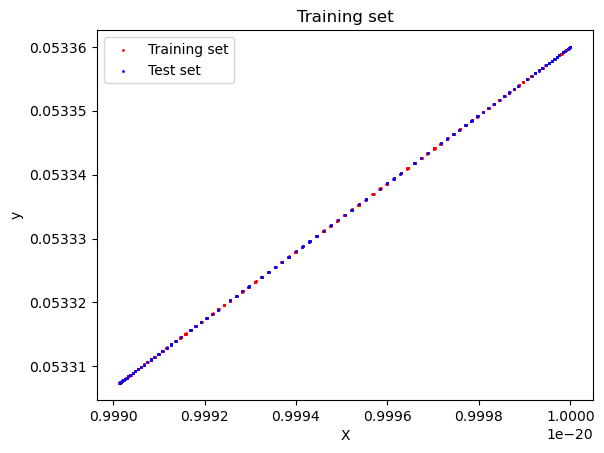

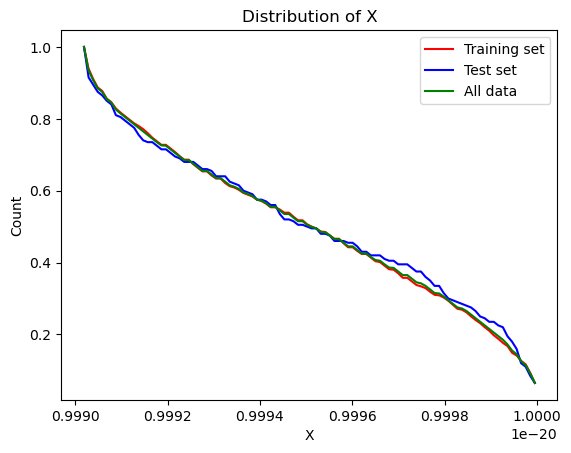

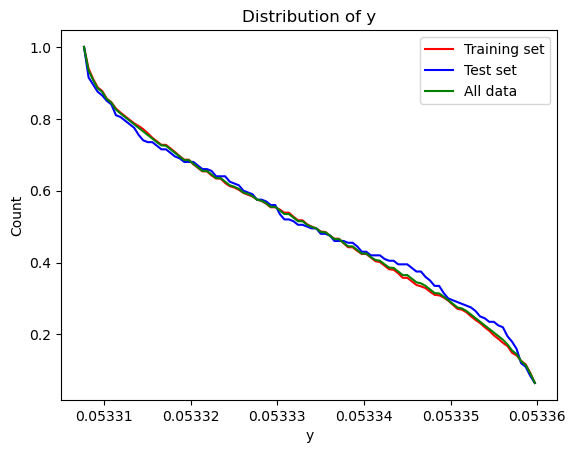

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Plot data to ensure it's representative of the data, with small point size
plt.scatter(X_train, y_train, color='red', s=1)
plt.scatter(X_test, y_test, color='blue', s=1)
plt.legend(['Training set', 'Test set'])
plt.title('Training set')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Show distrbutions of X_train and X_test and X itself

# Generate the histogram data directly
hist_X_train, bin_edges_X_train = np.histogram(X_train, bins=100)
hist_X_test, bin_edges_X_test = np.histogram(X_test, bins=100)
hist_X, bin_edges_X = np.histogram(X, bins=100)

# Get the reversed cumulative sum
hist_neg_cumulative_X_train = [np.sum(hist_X_train[i:]) for i in range(len(hist_X_train))]
hist_neg_cumulative_X_test = [np.sum(hist_X_test[i:]) for i in range(len(hist_X_test))]
hist_neg_cumulative_X = [np.sum(hist_X[i:]) for i in range(len(hist_X))]

# Get the bin centres rather than the edges
bin_centers_X_train = (bin_edges_X_train[:-1] + bin_edges_X_train[1:]) / 2.
bin_centers_X_test = (bin_edges_X_test[:-1] + bin_edges_X_test[1:]) / 2.
bin_centers_X = (bin_edges_X[:-1] + bin_edges_X[1:]) / 2.

# Divide by lengths
hist_neg_cumulative_X_train = np.array(hist_neg_cumulative_X_train) / len(X_train)
hist_neg_cumulative_X_test = np.array(hist_neg_cumulative_X_test) / len(X_test)
hist_neg_cumulative_X = np.array(hist_neg_cumulative_X) / len(X)

# Plot
plt.plot(bin_centers_X_train, hist_neg_cumulative_X_train, color='red')
plt.plot(bin_centers_X_test, hist_neg_cumulative_X_test, color='blue')
plt.plot(bin_centers_X, hist_neg_cumulative_X, color='green')
plt.legend(['Training set', 'Test set', 'All data'])
plt.title('Distribution of X')
plt.xlabel('X')
plt.ylabel('Count')
plt.show()

# Show distrbutions of y_train and y_test and y itself

# Generate the histogram data directly
hist_y_train, bin_edges_y_train = np.histogram(y_train, bins=100)
hist_y_test, bin_edges_y_test = np.histogram(y_test, bins=100)
hist_y, bin_edges_y = np.histogram(y, bins=100)

# Get the reversed cumulative sum
hist_neg_cumulative_y_train = [np.sum(hist_y_train[i:]) for i in range(len(hist_y_train))]
hist_neg_cumulative_y_test = [np.sum(hist_y_test[i:]) for i in range(len(hist_y_test))]
hist_neg_cumulative_y = [np.sum(hist_y[i:]) for i in range(len(hist_y))]

# Get the bin centres rather than the edges
bin_centers_y_train = (bin_edges_y_train[:-1] + bin_edges_y_train[1:]) / 2.
bin_centers_y_test = (bin_edges_y_test[:-1] + bin_edges_y_test[1:]) / 2.
bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2.

# Divide by lengths
hist_neg_cumulative_y_train = np.array(hist_neg_cumulative_y_train) / len(y_train)
hist_neg_cumulative_y_test = np.array(hist_neg_cumulative_y_test) / len(y_test)
hist_neg_cumulative_y = np.array(hist_neg_cumulative_y) / len(y)

# Plot
plt.plot(bin_centers_y_train, hist_neg_cumulative_y_train, color='red')
plt.plot(bin_centers_y_test, hist_neg_cumulative_y_test, color='blue')
plt.plot(bin_centers_y, hist_neg_cumulative_y, color='green')
plt.legend(['Training set', 'Test set', 'All data'])
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()


Since our X data set only has one feature (i.e. its a vector instead of a matrix) we will need to reshape the X components of our training and test data sets.

In [56]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

**Problem 5:** Using Scikit-Learn's linear regression model:
* Define a linear regression model, remembering to set `fit_intercept` to False
* Train the model using the training data
* Predict the values of the test set and store the predictions for later use

Coefficients: 
 [[5.336e+18]]


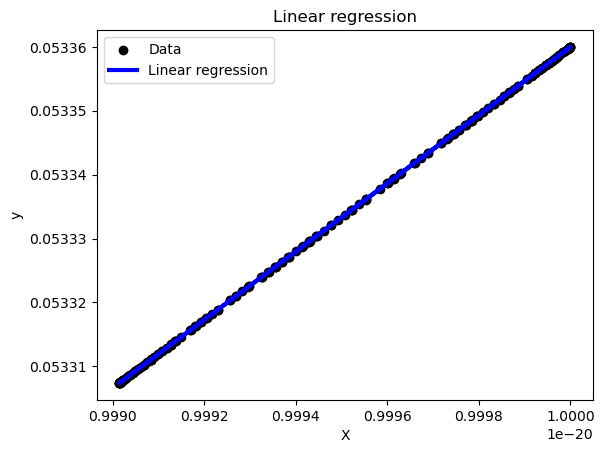

In [62]:
LiR5 = LinearRegression(fit_intercept=False)
LiR5.fit(X_train, y_train)

print('Coefficients: \n', LiR5.coef_)

y_pred_LiR5 = LiR5.predict(X_test)

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred_LiR5, color='blue', linewidth=3)
plt.legend(['Data', 'Linear regression'])
plt.title('Linear regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


Now let's define a function that will calculate the mean-squared error between two data sets.

In [60]:
def mse (A,B):
    return np.average((A-B)**2)

**Problem 6:** Using the MSE function defined above, calculate the MSE between the test data set and the predictions. Based in the MSE, is the machine learning model a good match for the data?

In [66]:
LiR5_mse = mse(y_pred_LiR5, y_test)
print(f'MSE: {LiR5_mse}')

MSE: 9.788538942348125e-34


According to the MSE, the machine learning model is a good match for the data.

**Problem 7:**. Finally, graph the test data set and the predicted data set as a function of time (remember that the y component of each data set is acceleration).  Make sure you have a legend on your graph and label the x and y axes.

In [ ]:
# Done in previous problem

Finally, let's extract the linear regression weights to see if we can extract the mass of the star.

In [73]:
LiR5weight = LiR5.coef_[0][0]
LiR5weight

5.335999999999996e+18

**Problem 8:** Finally, perform a mathematical operation on the linear regression weight to recover the mass of the star.  Remember that G = 6.67x10$^{-11}$ $\frac{N m^2}{kg^2}$.  The mass of the star used in the simulation to create the data set is 8x10$^{28}$.  How close is your result?

In [75]:
TheMassOfTheStarUsedInTheSimulationToCreateTheDataSet = LiR5weight/6.67e-11
TheMassOfTheStarUsedInTheSimulationToCreateTheDataSet

7.999999999999994e+28

## Practice What You Have Learned

Let's assume that we have a system that contains two objects, object 1 (mass = $m_1$, location = $\vec{r}_1$) and object 2 (mass = $m_2$, location = $\vec{r}_2$).  These two objects have a strange interaction but after much study we have been able to determine that the force on object 1 caused by object 2 can be modelled by the following equation:

$$\vec{F}_{12} = \frac{m_1^2m_2}{(\vec{r}_2-\vec{r}_1)^3} + \frac{m_1}{m_2}(\vec{r}_2-\vec{r}_1)$$

Unfortunately, we have not been able to determine their masses. However, we have been able to record their relative positions and the acceleration of the first object. Using this information, you are asked to determine the mass of the two objects. 

a. Before we begin coding, we need to develop a theoretical model to try to match.  Using the above force equation and Newton's second law, write an equation that relates the acceleration of object 1 to the relative distance between the two objects.

Letting $r$ be the distance between the two objects, we can write the acceleration of object 1 as:

$$a_1=\frac{m_1m_2}{r^3} + \frac{r}{m_2}$$

b. Using your equation from part a and the equation for linear regression ($\hat{y} = X\theta$), figure out which values correspond to $\hat{y}$, X, and $\theta$.

$\hat{y}=a_1$, $X=[\frac{1}{r^3}, r]$, $\theta=[m_1m_2, \frac{1}{m_2}]$

c. The data for this problem is stored in `data_notebook_2_objects`.  Import the data as a Pandas dataframe and print the first few lines.  The columns, in order, are: the time (in seconds), the acceleration of object 2 (m/s$^2$), the velocity of object 2 (m/s), and the relative position between the two objects (i.e. r$_2$ - r$_1$, measured in m).  Extract these columns each as a separate NumPy array and save them with useful names.

In [76]:
df_practice = pd.read_csv('data_notebook_2_objects.csv')

df_practice

,t,a,v,r
0,0.00,1.463571,0.000000,10.000000
1,0.01,1.463581,0.014636,10.000073
2,0.02,1.463610,0.029272,10.000293
3,0.03,1.463659,0.043908,10.000659
4,0.04,1.463726,0.058545,10.001171
...,...,...,...,...
995,9.95,31.090112,82.172085,217.630758
996,9.96,31.207722,82.483574,218.454033
997,9.97,31.325779,82.796241,219.280429
998,9.98,31.444283,83.110092,220.109958


In [77]:
practice_t = np.array(df_practice['t'].values)
practice_a = np.array(df_practice['a'].values)
practice_v = np.array(df_practice['v'].values)
practice_r = np.array(df_practice['r'].values)

d. Create a design matrix X using the imported data that corresponds to your answers to parts a and b. 

In [79]:
X = np.array([practice_r ** -3, practice_r]).T
y = np.array([practice_a]).T

e. Using the function `train_test_split` from Scikit-Learn, split your data into a training set and a test set. Use 20% of the data as the test data set.

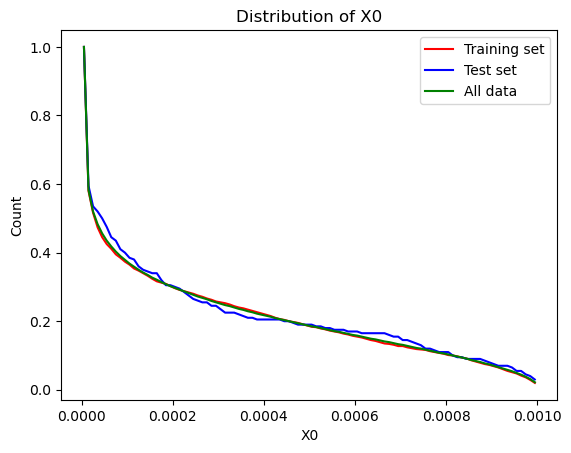

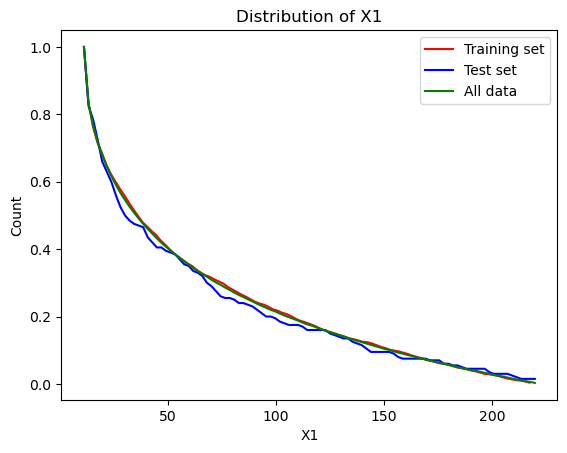

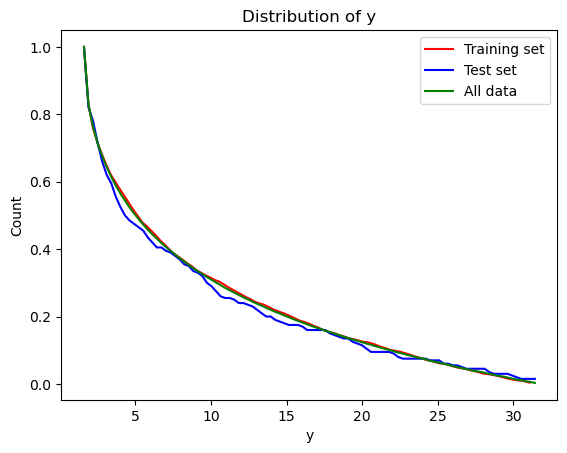

In [92]:
train_X, test_X, train_y, test_y, _, test_t = train_test_split(X, y, t, test_size=0.2)

# Plot distribution: train_X and test_X first component
# Generate the histogram data directly
hist_train_X0, bin_edges_train_X0 = np.histogram(train_X[:,0], bins=100)
hist_test_X0, bin_edges_test_X0 = np.histogram(test_X[:,0], bins=100)
hist_X0, bin_edges_X0 = np.histogram(X[:,0], bins=100)

# Get the reversed cumulative sum
hist_neg_cumulative_train_X0 = [np.sum(hist_train_X0[i:]) for i in range(len(hist_train_X0))]
hist_neg_cumulative_test_X0 = [np.sum(hist_test_X0[i:]) for i in range(len(hist_test_X0))]
hist_neg_cumulative_X0 = [np.sum(hist_X0[i:]) for i in range(len(hist_X0))]

# Get the bin centres rather than the edges
bin_centers_train_X0 = (bin_edges_train_X0[:-1] + bin_edges_train_X0[1:]) / 2.
bin_centers_test_X0 = (bin_edges_test_X0[:-1] + bin_edges_test_X0[1:]) / 2.
bin_centers_X0 = (bin_edges_X0[:-1] + bin_edges_X0[1:]) / 2.

# Divide by lengths
hist_neg_cumulative_train_X0 = np.array(hist_neg_cumulative_train_X0) / len(train_X[:,0])
hist_neg_cumulative_test_X0 = np.array(hist_neg_cumulative_test_X0) / len(test_X[:,0])
hist_neg_cumulative_X0 = np.array(hist_neg_cumulative_X0) / len(X[:,0])

# Plot
plt.plot(bin_centers_train_X0, hist_neg_cumulative_train_X0, color='red')
plt.plot(bin_centers_test_X0, hist_neg_cumulative_test_X0, color='blue')
plt.plot(bin_centers_X0, hist_neg_cumulative_X0, color='green')
plt.legend(['Training set', 'Test set', 'All data'])
plt.title('Distribution of X0')
plt.xlabel('X0')
plt.ylabel('Count')
plt.show()

# Plot distribution: train_X and test_X second component
# Generate the histogram data directly
hist_train_X1, bin_edges_train_X1 = np.histogram(train_X[:,1], bins=100)
hist_test_X1, bin_edges_test_X1 = np.histogram(test_X[:,1], bins=100)
hist_X1, bin_edges_X1 = np.histogram(X[:,1], bins=100)

# Get the reversed cumulative sum
hist_neg_cumulative_train_X1 = [np.sum(hist_train_X1[i:]) for i in range(len(hist_train_X1))]
hist_neg_cumulative_test_X1 = [np.sum(hist_test_X1[i:]) for i in range(len(hist_test_X1))]
hist_neg_cumulative_X1 = [np.sum(hist_X1[i:]) for i in range(len(hist_X1))]

# Get the bin centres rather than the edges
bin_centers_train_X1 = (bin_edges_train_X1[:-1] + bin_edges_train_X1[1:]) / 2.
bin_centers_test_X1 = (bin_edges_test_X1[:-1] + bin_edges_test_X1[1:]) / 2.
bin_centers_X1 = (bin_edges_X1[:-1] + bin_edges_X1[1:]) / 2.

# Divide by lengths
hist_neg_cumulative_train_X1 = np.array(hist_neg_cumulative_train_X1) / len(train_X[:,1])
hist_neg_cumulative_test_X1 = np.array(hist_neg_cumulative_test_X1) / len(test_X[:,1])
hist_neg_cumulative_X1 = np.array(hist_neg_cumulative_X1) / len(X[:,1])

# Plot

plt.plot(bin_centers_train_X1, hist_neg_cumulative_train_X1, color='red')
plt.plot(bin_centers_test_X1, hist_neg_cumulative_test_X1, color='blue')
plt.plot(bin_centers_X1, hist_neg_cumulative_X1, color='green')
plt.legend(['Training set', 'Test set', 'All data'])
plt.title('Distribution of X1')
plt.xlabel('X1')
plt.ylabel('Count')
plt.show()

# Plot distribution: train_y and test_y
# Generate the histogram data directly
hist_train_y, bin_edges_train_y = np.histogram(train_y, bins=100)
hist_test_y, bin_edges_test_y = np.histogram(test_y, bins=100)
hist_y, bin_edges_y = np.histogram(y, bins=100)

# Get the reversed cumulative sum
hist_neg_cumulative_train_y = [np.sum(hist_train_y[i:]) for i in range(len(hist_train_y))]
hist_neg_cumulative_test_y = [np.sum(hist_test_y[i:]) for i in range(len(hist_test_y))]
hist_neg_cumulative_y = [np.sum(hist_y[i:]) for i in range(len(hist_y))]

# Get the bin centres rather than the edges
bin_centers_train_y = (bin_edges_train_y[:-1] + bin_edges_train_y[1:]) / 2.
bin_centers_test_y = (bin_edges_test_y[:-1] + bin_edges_test_y[1:]) / 2.
bin_centers_y = (bin_edges_y[:-1] + bin_edges_y[1:]) / 2.

# Divide by lengths
hist_neg_cumulative_train_y = np.array(hist_neg_cumulative_train_y) / len(train_y)
hist_neg_cumulative_test_y = np.array(hist_neg_cumulative_test_y) / len(test_y)
hist_neg_cumulative_y = np.array(hist_neg_cumulative_y) / len(y)

# Plot
plt.plot(bin_centers_train_y, hist_neg_cumulative_train_y, color='red')
plt.plot(bin_centers_test_y, hist_neg_cumulative_test_y, color='blue')
plt.plot(bin_centers_y, hist_neg_cumulative_y, color='green')
plt.legend(['Training set', 'Test set', 'All data'])
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()


f. Using Scikit-Learn's linear regression model:
* Define a linear regression model, remembering to set `fit_intercept` to False
* Train the model using the training data
* Predict the values of the test set and store the predictions for later use

In [96]:
LiRf = LinearRegression()
LiRf.fit(train_X, train_y)
LiRf_pred = LiRf.predict(test_X)
LiRf_score = LiRf.score(test_X, test_y)
print('LiRf_score: ', LiRf_score)

LiRf_score:  1.0


g. Calculate the MSE error between the test data set and the predicted data set.  Based on this error, is the machine learning model a good fit for the data?

In [97]:
mse_LiRf = mse(test_y, LiRf_pred)
print(f"mse_LiRf: {mse_LiRf:.2f}")

mse_LiRf: 0.00


Methinks ***yes***.

h. Plot the predicted and test data sets on the same graph as a function of time.  Make sure you label your axes and add a legend.

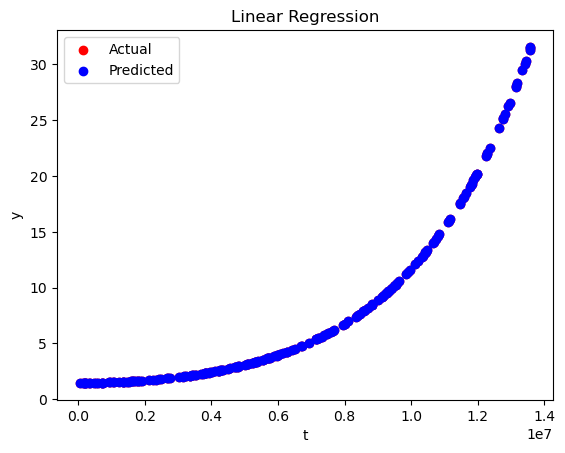

In [102]:
# Plot
plt.scatter(test_t, test_y, color='red')
plt.scatter(test_t, LiRf_pred, color='blue')
plt.legend(['Actual', 'Predicted'])
plt.title('Linear Regression')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

i. Extract the linear regression weights and use them to extract m$_1$ and m$_2$.  The values of m$_1$ and m$_2$ used to generate the data were 5kg and 7kg respectively.  How close were your answers?

In [105]:
coefs = LiRf.coef_[0]
print(f"coefs: {coefs}")

m1 = coefs[0] * coefs[1]
m2 = 1 / coefs[1]

print(f"m1: {m1:.2f}, m2: {m2:.2f}")

coefs: [35.          0.14285714]
m1: 5.00, m2: 7.00


I don't know. Is perfect accuracy required? Yes? Well, then I'm close enough.